In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('./data.csv')
print(df.head(5))
print(df.info())

         Date     Open     High      Low    Close     Adj Close    Volume
0  2017-12-21  51000.0  51060.0  49100.0  49140.0  42257.640625  15624300
1  2017-12-22  49400.0  49960.0  49240.0  49700.0  42739.214844  11199650
2  2017-12-26  49760.0  50100.0  48200.0  48200.0  41449.296875  16039850
3  2017-12-27  48960.0  49560.0  48460.0  49360.0  42828.902344  10743600
4  2017-12-28  49560.0  50960.0  49500.0  50960.0  44217.203125   8985450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.3+ KB
None


In [15]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.drop('Date', inplace=True, axis=1)

In [16]:
x = df.drop(['Close','Volume','Open'], axis=1)
y = df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, shuffle=False)

In [17]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [18]:
lp = lm.predict(x_test)

In [19]:
c = pd.DataFrame(df['Close'].tail(len(lp)))
c['Pred'] = lp
c.head()

,Close,Pred
Date,,
2021-12-20,77100.0,77389.431422
2021-12-21,78100.0,78042.424268
2021-12-22,79400.0,79230.424156
2021-12-23,79900.0,79765.111727
2021-12-24,80500.0,80550.608552


In [20]:
c.tail()

,Close,Pred
Date,,
2022-12-14,60500.0,60936.776606
2022-12-15,59300.0,60359.365980
2022-12-16,59500.0,59726.072934
2022-12-19,59500.0,60191.770060
2022-12-20,58600.0,59457.412807


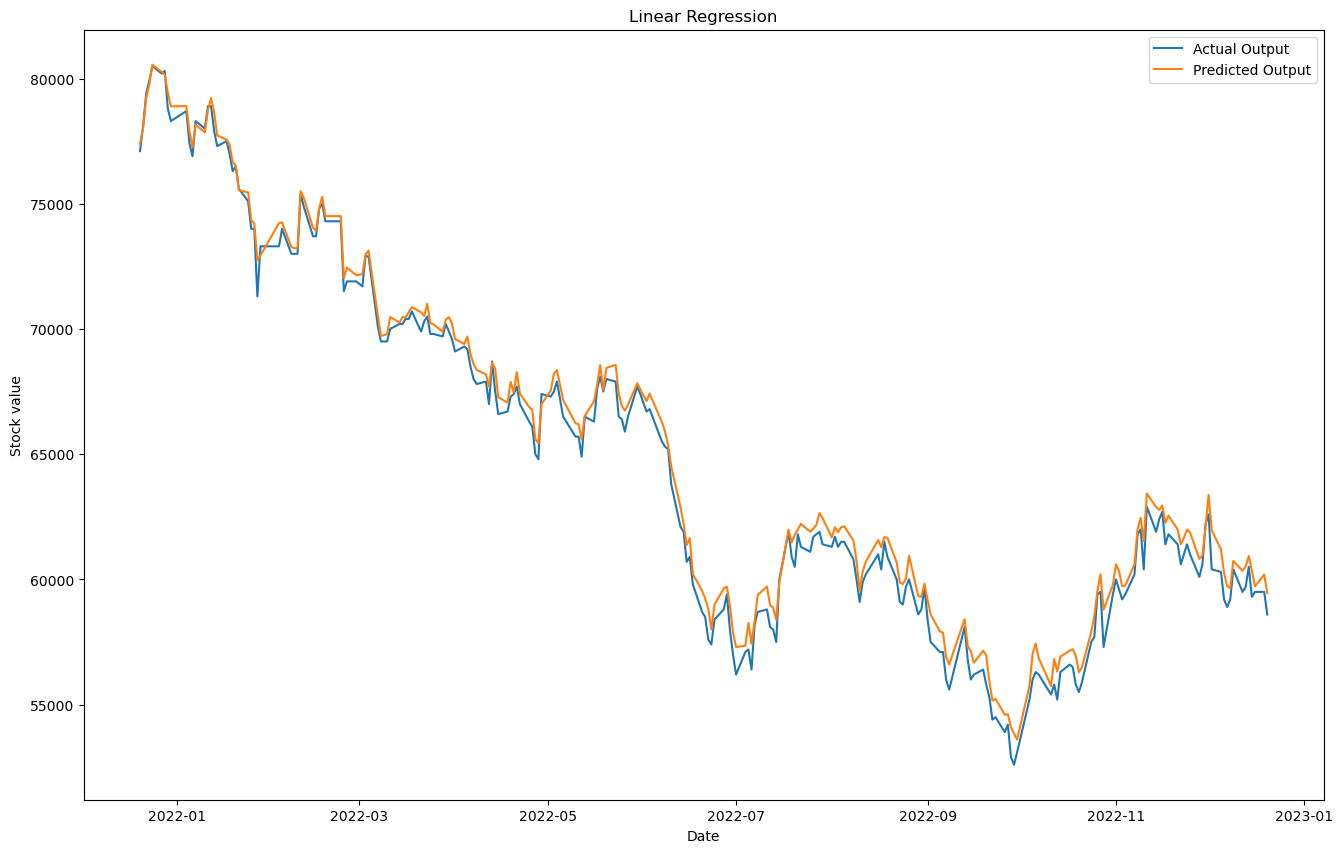

In [21]:
valid = pd.DataFrame()

plt.figure(figsize= (16,10))
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock value')
plt.plot(c[['Close']])
plt.plot(c[['Pred']])
plt.legend(['Actual Output','Predicted Output'], loc='upper right')
plt.show()